## Diplodatos
---
## Mentorias. Grupo 16
## Analisis inteligente de jugadores de un reconocido juego electronico


# Trabajo Práctico 1

**Integrantes:**

-Juan Cruz Bordón

-Nicolás Ambrosis

-Laura A. Feü 

# Sección 1: Análisis inicial del dataset

***(1) Cargar el dataset y armar el DataFrame.***

In [ ]:
#Lo primero que hacemos antes de cargar el DataSet y armar el DataFrame es realizar los import de las librerias correspondientes

import numpy as np
import pandas as pd
import io
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats.mstats import mode
from statistics import mode
pd.set_option('display.float_format', '{:,.2f}'.format)
import seaborn as sns
sns.set_context('talk')
import missingno as msno

In [ ]:
#Una vez realizado la carga de las librerias comenzamos con la carga del Set
# df = pd.read_csv('/content/drive/Shareddrives/Análisis Inteligente de Jugadores de Reconocido Juego Electrónico/lau-juan-nico/datos_jugadores.csv')
# df.head(5)


In [ ]:
#Una vez realizado la carga de las librerias comenzamos con la carga del Set
df = pd.read_csv('datos_jugadores.csv')
df.head(5)


,id,datetime,has_studies,gender,country,state,age,cups
0,5316ca1c5ddca8e6ceccfce58f3b8540e540ee22f6180f...,2021-11-08 14:05:15,f,Hombre,Argentina,Santa Fe,"1,997.00",1268
1,bbb965ab0c80d6538cf2184babad2a564a010376712012...,2021-11-08 14:05:16,t,Hombre,Argentina,Santa fe,"1,999.00",1212
2,b4944c6ff08dc6f43da2e9c824669b7d927dd1fa976fad...,2021-11-08 14:05:16,f,Hombre,Argentina,Entre Rios,"2,003.00",1343
3,434c9b5ae514646bbd91b50032ca579efec8f22bf0b4aa...,2021-11-08 14:05:16,t,Hombre,Venezuela,Aragua,"2,000.00",1237
4,cd70bea023f752a0564abb6ed08d42c1440f2e33e29914...,2021-11-08 14:05:16,t,Hombre,Venezuela,Carabobo,"2,000.00",1191


***(2) ¿Cuántos ejemplos y cuántos features hay en el dataset? ¿Qué información indica cada uno de los features?***

In [ ]:
#Hacemos un conteo y detalle de columnas
examples = len(df)
features = df.columns
print('Examples: ', examples,' \nFeatures: ',len(features),'\nDetalle de los features: ',features)

Examples:  4404492  
Features:  8 
Detalle de los features:  Index(['id', 'datetime', 'has_studies', 'gender', 'country', 'state', 'age',
       'cups'],
      dtype='object')


Por lo que podemos ver tenemos:

-Un total de 44044492 registros o ejemplos

-Un total de 8 tablas

Los nombres de las columnas son las siguientes y representan:

*   id: Código único de identficación perteneciente a cada jugador.
*   datetime: Fecha y hora del registro
*   has_studies: Si los jugadores tienen o no estudios
*   gender: Género de los jugadores
*   country: País de los jugadores
*   state: Provincia donde reciden los jugadores
*   age: Año de nacimiento de cada jugador
*   cups: Copas ganadas en el juego

***(3) ¿Qué valores puede tomar cada feature? ¿Son numéricos, categóricos? ¿Hay datos nulos?***

In [ ]:
#Revisaremos los tipos de datos que contienen cada una de las columnas
df.dtypes

id              object
datetime        object
has_studies     object
gender          object
country         object
state           object
age            float64
cups             int64
dtype: object

In [ ]:
#Vamos a sumar los nulos en todo el DF
df.isnull().sum()

id                 0
datetime           0
has_studies    56878
gender         39077
country        39077
state          59086
age            39077
cups               0
dtype: int64

In [ ]:
#Ahora veamos los datos unicos delDF
df.nunique()

id                1439
datetime       1290840
has_studies          2
gender               4
country             21
state              213
age                 49
cups              2001
dtype: int64

Con esto podemos observar que los tipos de datos que vamos a estar manejando con nuestro data frame es el siguiente:

*   id -> object / categórico
*   datetime -> object / categórico
*   has_studies -> object / categórico 
*   gender -> object / categórico 
*   country -> object / categórico 
*   state -> object / categórico
*   age -> float64 / numerico
*   cups -> int64 / numerico

Cuando sumamos los datos nulos del data frame nos encontramos con que algunas columnas con datos faltantes, por que es eso es algo en lo que se tendra que trabajar dado que son la mayoria de las columnas.

Podemos notar tambien que cuando hicimos la funcion de unique para que nos traiga todos los registros unicos, nos damos cuenta que en el id, que tendría que ser un dato unico por cada jugador solo esta 1439 cuando el DF tiene un total de 44044492. Es un dato muy importante a tener en cuenta.

***(4) ¿Es una serie temporal o no? ¿Cómo se da cuenta?***

In [ ]:
#Convertimos la columna "datetime" en un tipo de dato datetime ya que anteriormente notamos que un tipo objeto
df['datetime'] = pd.to_datetime(df['datetime'])
df.dtypes

id                     object
datetime       datetime64[ns]
has_studies            object
gender                 object
country                object
state                  object
age                   float64
cups                    int64
dtype: object

No tiene una serie de tiempo dado que el campo de fecha del DF era de tipo Object por lo cual, para poder pasarlo a una serie de tiempo lo que se hizo fue pasar esa columna a datime con la funcion *'to.datetime'* de *pandas*

# Sección 2: Análisis descriptivo

***(1) ¿Cuántos jugadores hay en el dataset?***

In [ ]:
print("Hay {} jugadores en el dataset".format(len(df.id.unique())))

Hay 1439 jugadores en el dataset


Cuando usamos la funcion unique() con la columna id de nuestro DF podemos ver que solo tenemos 1439 jugadores 

***(2) Elegir un jugador cualquiera y hacerle un análisis descriptivo.***

In [ ]:
#Primero seleccionamos un jugador y vemos algunos de sus datos en nuestro DF
player_x = df.sample(1)
player_x

,id,datetime,has_studies,gender,country,state,age,cups
2728446,c22e1a4acbd2d996ff19a852585f9434883c30124f6b11...,2022-01-21 19:36:39,f,Mujer,Argentina,santa fe,"1,987.00",1164


In [ ]:
print('Con estos datos podemos saber que el jugador seleccionado:')
print(' * Terminó los estudios?', player_x.iloc[0]['has_studies'])
print(' * Su genero es', player_x.iloc[0]['gender'])
print(' * Es de', player_x.iloc[0]['country'])
print(' * Reside en', player_x.iloc[0]['state'])
print(' * Su año de nacimiento es', player_x.iloc[0]['age'])
print(' * La cantidad de copas gandas fueron', player_x.iloc[0]['cups'])

Con estos datos podemos saber que el jugador seleccionado:
 * Terminó los estudios? f
 * Su genero es Mujer
 * Es de Argentina
 * Reside en santa fe
 * Su año de nacimiento es 1987.0
 * La cantidad de copas gandas fueron 1164


In [ ]:
id_player_x = player_x.iloc[0]['id']
print(id_player_x)

41cfc0d1f2d127b04555b7246d84019b4d27710a3f3aff6e7764375b1e06e05d


In [ ]:
df_player_x = df[df.id == id_player_x][['id','datetime','cups']].sort_values('datetime')
df_player_x

,id,datetime,cups
447271,41cfc0d1f2d127b04555b7246d84019b4d27710a3f3aff...,2021-10-06 02:49:28,0
447285,41cfc0d1f2d127b04555b7246d84019b4d27710a3f3aff...,2021-10-06 02:50:03,1381
447384,41cfc0d1f2d127b04555b7246d84019b4d27710a3f3aff...,2021-10-06 03:00:08,1381
447499,41cfc0d1f2d127b04555b7246d84019b4d27710a3f3aff...,2021-10-06 03:15:09,1381
447610,41cfc0d1f2d127b04555b7246d84019b4d27710a3f3aff...,2021-10-06 03:30:09,1381
...,...,...,...
2263203,41cfc0d1f2d127b04555b7246d84019b4d27710a3f3aff...,2022-01-01 17:09:11,1587
2263552,41cfc0d1f2d127b04555b7246d84019b4d27710a3f3aff...,2022-01-01 17:37:36,1587
2264017,41cfc0d1f2d127b04555b7246d84019b4d27710a3f3aff...,2022-01-01 18:09:21,1587
2264742,41cfc0d1f2d127b04555b7246d84019b4d27710a3f3aff...,2022-01-01 18:45:24,1587


In [ ]:
print(f'El jugador {id_player_x} tiene {len(df_player_x)} entradas en la base de datos')

El jugador 41cfc0d1f2d127b04555b7246d84019b4d27710a3f3aff6e7764375b1e06e05d tiene 10826 entradas en la base de datos


In [ ]:
df_player_x.cups.value_counts(dropna = False).sort_index()

0          1
1157    1331
1174    3202
1328       3
1343       2
1359       3
1360      79
1362       3
1381    5361
1398       2
1399       2
1413       5
1418      87
1428       3
1431      48
1432      86
1434       3
1441      82
1442       2
1456       3
1457       3
1458       3
1462      27
1464       6
1472       3
1473      38
1475       2
1481       7
1488     155
1496      16
1498       3
1505       2
1513       3
1517      80
1521       3
1527       3
1529      19
1532      35
1547       2
1552       6
1579       2
1587      87
1591       3
1609       7
1617       3
Name: cups, dtype: int64

***(3) Realizar un análisis descriptivo global (teniendo en cuenta a todos los jugadores).***

In [ ]:
#Hacemos una descripcion rapida
df.describe().round(1)

,age,cups
count,"4,365,415.00","4,404,492.00"
mean,"1,983.50","1,161.30"
std,162.20,432.10
min,3.00,-4.00
25%,"1,995.00","1,100.00"
50%,"1,998.00","1,235.00"
75%,"2,000.00","1,390.00"
max,"2,022.00","2,866.00"


In [ ]:
#Contamos los diferentes paises que salen en el DF
country_count = df.country.value_counts(normalize = True).reset_index().rename(columns={'index': 'Country', 'country': 'frequency'})
country_count

,Country,frequency
0,Argentina,0.68
1,Venezuela,0.30
2,Philippines,0.01
3,Perú,0.00
4,Ecuador,0.00
5,venezuela,0.00
6,argentina,0.00
7,España,0.00
8,Colombia,0.00
9,Costa Rica,0.00


In [ ]:
#Contamos los diferentes provincias que salen en el DF
state_count = df.state.value_counts(normalize=True).reset_index().rename(columns={'index': 'State', 'state': 'frequency'})
state_count

,State,frequency
0,Buenos Aires,0.21
1,Santa Fe,0.09
2,Buenos aires,0.08
3,Zulia,0.05
4,Santa fe,0.04
...,...,...
208,La Habana,0.00
209,Atlántico,0.00
210,Estado Aragua,0.00
211,falcon,0.00


In [ ]:
#Contamos los diferentes generos que salen en el DF
gender_count = df.gender.value_counts(normalize= True).reset_index().rename(columns={'index': 'Gender', 'gender': 'frequency'})
gender_count

,Gender,frequency
0,Hombre,0.92
1,Mujer,0.07
2,Prefiero no decir,0.00
3,Otro,0.00


In [ ]:
#Contamos los estudios finalizados o no que salen en el DF
has_studies_count = df.has_studies.value_counts(normalize=True).reset_index().rename(columns={'index': 'has_studies', 'has_studies': 'frequency'})
has_studies_count

,has_studies,frequency
0,t,0.67
1,f,0.33


Al realizar este analisis rapido de todo el DF podemos decir que:


*   Argentina	tiene una frecuencia de 0.678579
*   Buenos Aires es la provincia que más jugadores tiene
*   El genero mas frecuente entre los jugadores es masculino
*   Tenemos mas jugadores que terminaron sus estudios
*   El 50%  nacio en 1998
*   El maximo de copas ganadas por un jugador es de 2866


In [ ]:
df.id

0          5316ca1c5ddca8e6ceccfce58f3b8540e540ee22f6180f...
1          bbb965ab0c80d6538cf2184babad2a564a010376712012...
2          b4944c6ff08dc6f43da2e9c824669b7d927dd1fa976fad...
3          434c9b5ae514646bbd91b50032ca579efec8f22bf0b4aa...
4          cd70bea023f752a0564abb6ed08d42c1440f2e33e29914...
                                 ...                        
4404487    6a97982dccf77dd3dafa27fcbdf75c017301f730ba186b...
4404488    535fa30d7e25dd8a49f1536779734ec8286108d115da50...
4404489    712dca40936b39ce670dc803736fe3735cf99311030a92...
4404490    68722dedde84631c45b4aade9365a91aa6fd11c5766e66...
4404491    40367c3cc999a9f9e951a1d33211545b84b2d5a63933b0...
Name: id, Length: 4404492, dtype: object

In [ ]:
df.id[1]

'bbb965ab0c80d6538cf2184babad2a564a010376712012bd07b0af92dcd3097d'

In [ ]:
df.id.nunique()

1439

Si bien el dataset tiene 4,4 millones de observciones pareciera que tenemos datos de 1439 jugadores diferentes

In [ ]:
df.id.value_counts()

2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e    15746
a21855da08cb102d1d217c53dc5824a3a795c1c1a44e971bf01ab9da3a2acbbf    15673
a46e37632fa6ca51a13fe39a567b3c23b28c2f47d8af6be9bd63e030e214ba38    15505
482d9673cfee5de391f97fde4d1c84f9f8d6f2cf0784fcffb958b4032de7236c    15486
a68b412c4282555f15546cf6e1fc42893b7e07f271557ceb021821098dd66c1b    15287
                                                                    ...  
8c454536b6e2b8b29a1d839aa3c5ccf0ab57a590d619739b23a32d11585220c9        3
9c19f29d0e6fefa21eec58f6ff4d0cf807b63d0ed146f1fea0874506b66c35ee        2
51e1424eeb514560081905811593feb19b6594c1e79146eae6fff3bed87a3e5a        1
1625f9db144171f78dc64afa00f5f5065f176d05eb8f9dcb11f6c8cd3624aaa6        1
7f861bcee185de001377d79e08af62e94b1e7718e2470e08520c917f8d953602        1
Name: id, Length: 1439, dtype: int64

Hay jugadores (id's) que aparecen unas pocas veces y otros que aparecen mas de 15 mil veces

In [ ]:
df.datetime

0         2021-11-08 14:05:15
1         2021-11-08 14:05:16
2         2021-11-08 14:05:16
3         2021-11-08 14:05:16
4         2021-11-08 14:05:16
                  ...        
4404487   2022-04-18 13:14:50
4404488   2022-04-18 13:14:52
4404489   2022-04-18 13:15:10
4404490   2022-04-18 13:15:14
4404491   2022-04-18 13:15:22
Name: datetime, Length: 4404492, dtype: datetime64[ns]

In [ ]:
df_20 = df[:20]
for i in df_20.datetime:
  print(type(i))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.tim

In [ ]:
player_x = df[df.id == 'bbb965ab0c80d6538cf2184babad2a564a010376712012bd07b0af92dcd3097d']
player_x.sort_values(by=['datetime'], ascending=False)

,id,datetime,has_studies,gender,country,state,age,cups
4404056,bbb965ab0c80d6538cf2184babad2a564a010376712012...,2022-04-18 13:12:48,t,Hombre,Argentina,Santa fe,"1,999.00",1498
4403972,bbb965ab0c80d6538cf2184babad2a564a010376712012...,2022-04-18 12:30:31,t,Hombre,Argentina,Santa fe,"1,999.00",1498
4403515,bbb965ab0c80d6538cf2184babad2a564a010376712012...,2022-04-18 12:14:35,t,Hombre,Argentina,Santa fe,"1,999.00",1498
4403041,bbb965ab0c80d6538cf2184babad2a564a010376712012...,2022-04-18 11:31:41,t,Hombre,Argentina,Santa fe,"1,999.00",1498
4402913,bbb965ab0c80d6538cf2184babad2a564a010376712012...,2022-04-18 11:11:27,t,Hombre,Argentina,Santa fe,"1,999.00",1498
...,...,...,...,...,...,...,...,...
447752,bbb965ab0c80d6538cf2184babad2a564a010376712012...,2021-10-06 03:45:12,t,Hombre,Argentina,Santa fe,"1,999.00",1212
447652,bbb965ab0c80d6538cf2184babad2a564a010376712012...,2021-10-06 03:30:12,t,Hombre,Argentina,Santa fe,"1,999.00",1212
447512,bbb965ab0c80d6538cf2184babad2a564a010376712012...,2021-10-06 03:15:11,t,Hombre,Argentina,Santa fe,"1,999.00",1212
447418,bbb965ab0c80d6538cf2184babad2a564a010376712012...,2021-10-06 03:05:02,t,Hombre,Argentina,Santa fe,"1,999.00",1212


In [ ]:
df.datetime.nunique()

1290840

Esto quiere decir que el sistema chequeo 1,2 millones de veces el estado de los jugadores en el sistema.

In [ ]:
df.has_studies

0          f
1          t
2          f
3          t
4          t
          ..
4404487    f
4404488    t
4404489    t
4404490    t
4404491    t
Name: has_studies, Length: 4404492, dtype: object

In [ ]:
df.has_studies.unique()

array(['f', 't', nan], dtype=object)

In [ ]:
df.has_studies.value_counts(dropna=False)
# hay muchas celdas que no estan completadas.

t      2894122
f      1453492
NaN      56878
Name: has_studies, dtype: int64

La columna has_studies contiene dos valores t (true) y f (false). No es muy informativa acerca del nivel de estudios de la persona que esta jugando. Notar que hay bastantes datos incompletos.

In [ ]:
df.gender

0          Hombre
1          Hombre
2          Hombre
3          Hombre
4          Hombre
            ...  
4404487    Hombre
4404488    Hombre
4404489    Hombre
4404490    Hombre
4404491    Hombre
Name: gender, Length: 4404492, dtype: object

In [ ]:
df.gender.value_counts(dropna = False)

Hombre               4035262
Mujer                 310705
NaN                    39077
Prefiero no decir      16671
Otro                    2777
Name: gender, dtype: int64

Las celdas anteriores muestran que el 92% de los datos del dataset corresponden a Hombres y solo un pequeno porcentaje a los otros genero. En analisis posteriores sera importante tener esto en cuenta para evitar llegar a conclusiones sesgadas.

In [ ]:
df.country

0          Argentina
1          Argentina
2          Argentina
3          Venezuela
4          Venezuela
             ...    
4404487    Argentina
4404488    Argentina
4404489    Venezuela
4404490    Argentina
4404491    Venezuela
Name: country, Length: 4404492, dtype: object

In [ ]:
df.country.nunique()

21

In [ ]:
df.country.value_counts(dropna=False)

Argentina                2962277
Venezuela                1312742
NaN                        39077
Philippines                30906
Perú                       13912
Ecuador                     9603
venezuela                   8277
argentina                   6359
España                      4532
Colombia                    3567
Costa Rica                  2990
Uruguay                     2827
México                      2064
Bolivia                     2021
Venezuela - Maracaibo        889
Cuba                         772
Chile                        751
Venenezuela                  295
Argentino                    220
colombia                     197
ARGENTINA                    178
De Venezuela                  36
Name: country, dtype: int64

Notar que hay paises que tienen 2 o mas formas diferentes. Ej: Argentina = ['Argentina', 'argentina', 'Argentino', 'ARGENTINA'].

In [ ]:
df.state.nunique()

213

In [ ]:
df.state.value_counts(dropna=False)

Buenos Aires         926677
Santa Fe             383791
Buenos aires         345030
Zulia                235140
Santa fe             172305
                      ...  
Atlántico                49
La Habana                49
Estado Aragua            36
falcon                   17
Carabobo valencia         5
Name: state, Length: 214, dtype: int64

In [ ]:
for i in df.state.unique():
    print(i)

Santa Fe
Santa fe
Entre Rios
Aragua
Carabobo
Cordoba
Buenos Aires
C.A.B.A
nan
Entre Ríos
Entre rios
Buenos aires
CABA
Córdoba
la Rioja
santa fe
Bueno Aires
Santafe
cordoba
Chaco
Santiago del Estero
Neuquen
Mendoza
San luis
Zulia
Monagas
Aragua - región central
cumana
Caracas
Miranda
Bs.as
Tierra del Fuego
Santaigo del Estero
Tucumán
buenos aires
Anzoátegui
Merida
Corrientes
Yaracuy
la rioja
Distrito Capital
Guárico
Distrito capital
santiago del estero
Miranda  - Caracas
Tachira
Bolivar
Entre ríos
Ciudad de Buenos aires
San Juan
Lara
San Luis
Ezequiel zamora
Tucuman
Táchira
Coro
Ciudad autónoma de Buenos Aires
Maracaibo
Sucre
Rio negro
Pilar
Maturin
Lima
Chubut
Mérida
Catamarca
Cojedes
Edo Guárico
Rio Negro
camarines sur naga city
Capital
Valencia
La Guaira
Nueva Esparta
Capital Federal
Orellana
Anzoategui
Catia la mar
montalban estado carabobo
Salta
Zulia - Maracaibo
Guarico
carabobo
Edo.Miranda
caracas
Camarines sur naga city
La guaira
Estado bolivariano de miranda
monagas
camarines s

In [ ]:
state = df.groupby('country')['state'].unique()
state

country
ARGENTINA                                                   [BUENOS AIRES]
Argentina                [Santa Fe, Santa fe, Entre Rios, Cordoba, Buen...
Argentino                                                   [Buenos Aires]
Bolivia                              [Santa Cruz de la Sierra, Santa Cruz]
Chile                                                  [Bio Bio, santiago]
Colombia                 [Atlántico, Dosquebradas, Cundinamarca, Bogotá...
Costa Rica                                   [San José, Cartago, Alajuela]
Cuba                                      [La Habana, Matanzas, Las Tunas]
De Venezuela                                               [Estado Aragua]
Ecuador                            [Orellana, Guayas, Imbabura, Pichincha]
España                                       [Valencia, Madrid, Andalucía]
México                                                [Tlaxcala, Veracruz]
Perú                                                      [Lima, Chiclayo]
Philippines      

Con la columna states vamos a tener el mismo problema que con la columna country. Hay muchas versiones que corresponden a un mismo state. En algun momento vamos a tener que arreglar esto.

In [ ]:
df.age.unique()

array([1997., 1999., 2003., 2000., 2001., 1996., 1994., 1998., 1995.,
       1990., 1993., 2002., 1991.,   91., 1986., 1989., 2005.,   nan,
       1992.,   97., 1973., 1980., 2021., 1985., 2004., 1987., 1979.,
       1983., 1981., 1982., 1966., 1968., 1972., 1988., 1961., 1984.,
       1977.,    3., 1978., 1967.,   99.,  200., 1974., 1963., 1959.,
       1975., 1976., 1970., 2009., 2022.])

In [ ]:
df.age.value_counts(dropna=False).sort_index()

3.00           678
91.00        19199
97.00         9167
99.00         2611
200.00         195
1,959.00      1555
1,961.00      1404
1,963.00       429
1,966.00      2516
1,967.00       752
1,968.00      4233
1,970.00       975
1,972.00      4028
1,973.00     14713
1,974.00      3295
1,975.00      1112
1,976.00       240
1,977.00       451
1,978.00      2576
1,979.00      7308
1,980.00     11931
1,981.00      4227
1,982.00      5763
1,983.00      5703
1,984.00      5048
1,985.00      7816
1,986.00     17367
1,987.00     10587
1,988.00      9155
1,989.00     45964
1,990.00     68330
1,991.00    178418
1,992.00    117665
1,993.00    130687
1,994.00    223776
1,995.00    244079
1,996.00    320012
1,997.00    348563
1,998.00    365273
1,999.00    599284
2,000.00    564774
2,001.00    392502
2,002.00    286027
2,003.00    293785
2,004.00      8920
2,005.00     14851
2,009.00       603
2,021.00      6370
2,022.00       498
nan          39077
Name: age, dtype: int64

Notar que la columna age pareciera estar completada con el añoo de nacimiento y no con la edad. Mas adelante vamos a tener que modificar esto.

Ademas hay algunos datos raros. Hay 6868 entradas en las que la columna age fue completada con 2021 o 2022.

In [ ]:
df.cups.describe()
# es raro que el minimo sea negativo... por que sera?

count   4,404,492.00
mean        1,161.28
std           432.13
min            -4.00
25%         1,100.00
50%         1,235.00
75%         1,390.00
max         2,866.00
Name: cups, dtype: float64

In [ ]:
df[df.cups == -4]
# hay 1058 casos de personas que tienen cups = -4.

,id,datetime,has_studies,gender,country,state,age,cups
1809113,684fe39f03758de6a882ae61fa62312b67e5b1e665928c...,2021-12-20 15:01:36,NaN,NaN,NaN,NaN,nan,-4
1809963,684fe39f03758de6a882ae61fa62312b67e5b1e665928c...,2021-12-20 15:15:56,NaN,NaN,NaN,NaN,nan,-4
1810296,684fe39f03758de6a882ae61fa62312b67e5b1e665928c...,2021-12-20 15:39:28,NaN,NaN,NaN,NaN,nan,-4
1810825,684fe39f03758de6a882ae61fa62312b67e5b1e665928c...,2021-12-20 15:45:55,NaN,NaN,NaN,NaN,nan,-4
1811063,684fe39f03758de6a882ae61fa62312b67e5b1e665928c...,2021-12-20 16:04:53,NaN,NaN,NaN,NaN,nan,-4
...,...,...,...,...,...,...,...,...
2325150,684fe39f03758de6a882ae61fa62312b67e5b1e665928c...,2022-01-04 07:16:35,NaN,NaN,NaN,NaN,nan,-4
2325534,684fe39f03758de6a882ae61fa62312b67e5b1e665928c...,2022-01-04 07:32:05,NaN,NaN,NaN,NaN,nan,-4
2326111,684fe39f03758de6a882ae61fa62312b67e5b1e665928c...,2022-01-04 08:10:27,NaN,NaN,NaN,NaN,nan,-4
2326488,684fe39f03758de6a882ae61fa62312b67e5b1e665928c...,2022-01-04 08:37:45,NaN,NaN,NaN,NaN,nan,-4


In [ ]:
neg_df = df[df.cups < 0]
# no hay otros valores negativos, asi que el -4 tiene que tener algun significado especifico.

<AxesSubplot:>

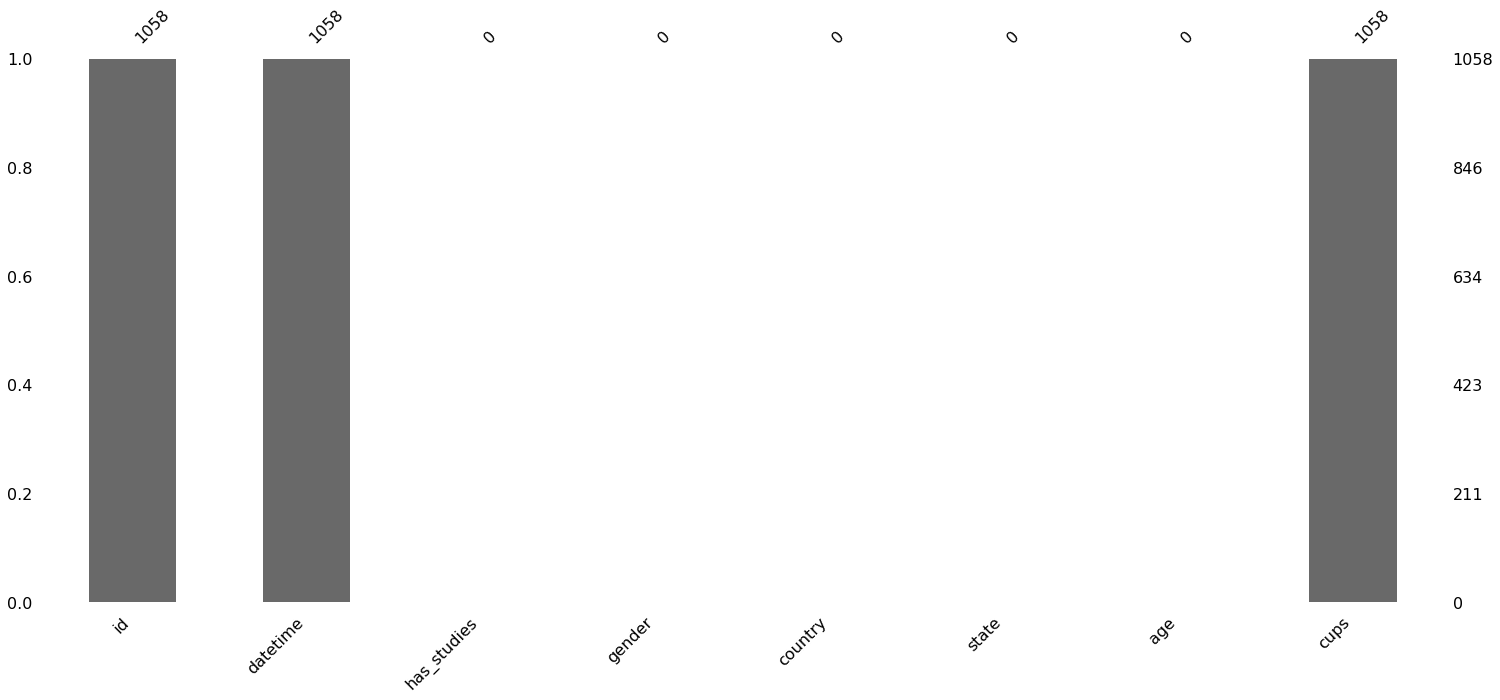

In [ ]:
msno.bar(neg_df)

Notar que las 1058 observaciones que tienen valor -4 en la columna cups no tienen nada completado de las columnas 'has_studies', 'gender', 'country', 'state' y 'age' asi que probablemente sean casos que tengamos que descartar.

# Sección 3: Visualización

***(1) Realizar los gráficos correspondientes al análisis obtenido en la sección 2.***

In [ ]:
mode = mode(df.age)
print(mode)

1999.0


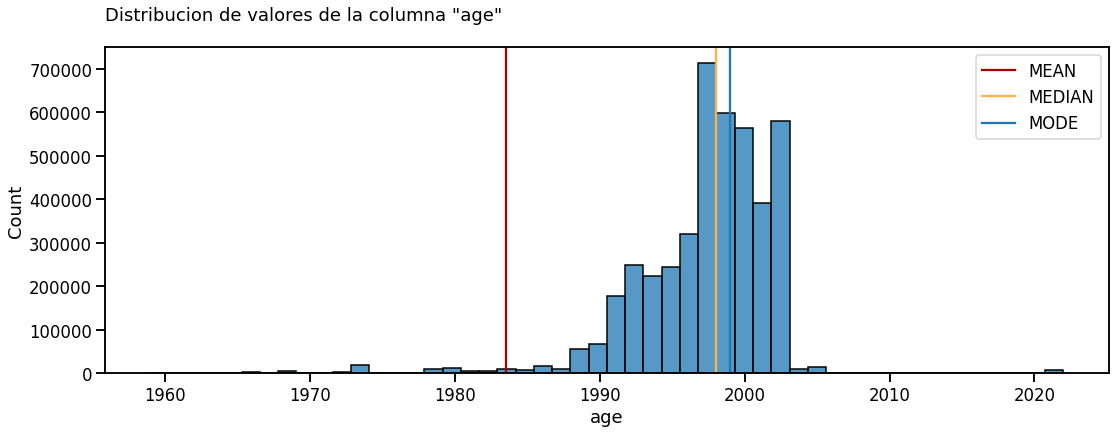

In [ ]:
fig = plt.figure(figsize = (18,6))
sns.histplot(data = df.age[df.age>1950],
            bins = 50)

plt.axvline(x = df.age.mean(), 
           color = '#a80000',
           label = 'MEAN')

plt.axvline(x = df.age.median(),
           color = '#ffb14a',
           label = 'MEDIAN')
plt.axvline(x = mode,
           label = 'MODE')

plt.legend()

plt.title('Distribucion de valores de la columna "age"\n',
         loc='left')

plt.show()

In [ ]:
df.gender.value_counts(dropna = False)

Hombre               4035262
Mujer                 310705
NaN                    39077
Prefiero no decir      16671
Otro                    2777
Name: gender, dtype: int64

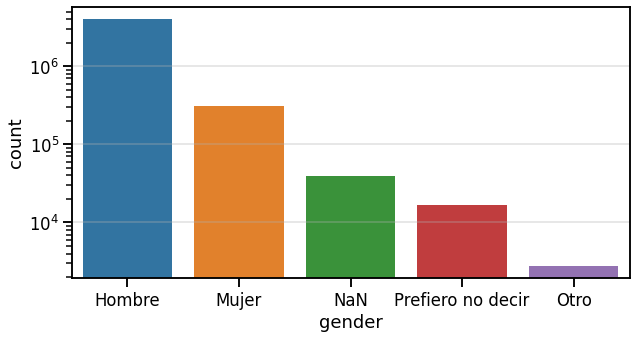

In [ ]:
fig = plt.figure(figsize = (10,5))

sns.set_context('talk')
sns.countplot(data = df.fillna('NaN'),
             x = 'gender')

# definimos la escala del eje Y como logartimica porque hay mucha diferencia entre Hombres y los demas generos
plt.yscale('log')

plt.grid(which = 'major', axis = 'y', alpha = 0.4)

plt.show()

In [ ]:
df[df.id == '00037f39cf870a1f49129f9c82d935665d352ffd25ea3296208f6f7b16fd654f'][['id','cups']].sort_values('cups')

,id,cups
2962092,00037f39cf870a1f49129f9c82d935665d352ffd25ea32...,1019
2961701,00037f39cf870a1f49129f9c82d935665d352ffd25ea32...,1019
2845749,00037f39cf870a1f49129f9c82d935665d352ffd25ea32...,1037
2846145,00037f39cf870a1f49129f9c82d935665d352ffd25ea32...,1037
2846490,00037f39cf870a1f49129f9c82d935665d352ffd25ea32...,1039
...,...,...
3030492,00037f39cf870a1f49129f9c82d935665d352ffd25ea32...,1211
3031109,00037f39cf870a1f49129f9c82d935665d352ffd25ea32...,1211
3031722,00037f39cf870a1f49129f9c82d935665d352ffd25ea32...,1211
3043565,00037f39cf870a1f49129f9c82d935665d352ffd25ea32...,1211


Tomando un id al azar vemos que el primer dato de copas que tenemos en 1019. Es extranio, porque hubiera esperado que un jugador comience el juego con 0 copas.

In [ ]:
cups = df.groupby('id').max('cups')
cups

,age,cups
id,,
00037f39cf870a1f49129f9c82d935665d352ffd25ea3296208f6f7b16fd654f,"1,997.00",1211
000f21ac06aceb9cdd0575e82d0d85fc39bed0a7a1d71970ba1641666a44f530,"2,003.00",1559
00328ce57bbc14b33bd6695bc8eb32cdf2fb5f3a7d89ec14a42825e15d39df60,"1,996.00",1859
0038263cc90dfa55d621a6425e46020136a318d12b974340f518892a6ef690ff,"1,996.00",1221
0087cf99a4636ebd9a0f66eaf98fde8bca977e2a274bc832cc903c3561735e9d,"1,995.00",1200
...,...,...
ff2ccb6ba423d356bd549ed4bfb76e96976a0dcde05a09996a1cdb9f83422ec4,"2,000.00",1724
ff5a1ae012afa5d4c889c50ad427aaf545d31a4fac04ffc1c4d03d403ba4250a,"2,000.00",1856
ffa6059b954a4602a9fa1518d10ca6163bce3f9d4bd3ee51c860eb6c2da16675,"2,003.00",1176


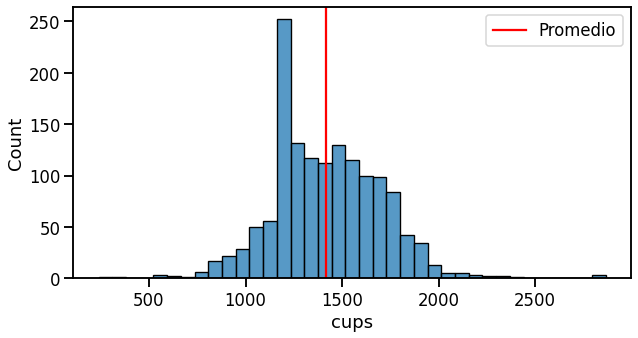

In [ ]:
fig = plt.figure(figsize = (10,5))

sns.histplot(data = cups,
             x = 'cups',)

# agregamos una linea vertical que indica el promedio de copas que tienen los jugadores

plt.axvline(x = cups.cups.mean(), 
           color = 'red',
           label = 'Promedio')


plt.legend()

plt.show()

Para obtener esta figura lo primero que hicimos fue agrupar los datos por id y luego calcular cual era el valor maximo para la columna cups. de esta manera el grafico muestra la distribucion del numero de copas ganas por los jugadores. ademas calculamos el promedio (1415).

In [ ]:
df.country.value_counts(dropna = False)

Argentina                2962277
Venezuela                1312742
NaN                        39077
Philippines                30906
Perú                       13912
Ecuador                     9603
venezuela                   8277
argentina                   6359
España                      4532
Colombia                    3567
Costa Rica                  2990
Uruguay                     2827
México                      2064
Bolivia                     2021
Venezuela - Maracaibo        889
Cuba                         772
Chile                        751
Venenezuela                  295
Argentino                    220
colombia                     197
ARGENTINA                    178
De Venezuela                  36
Name: country, dtype: int64

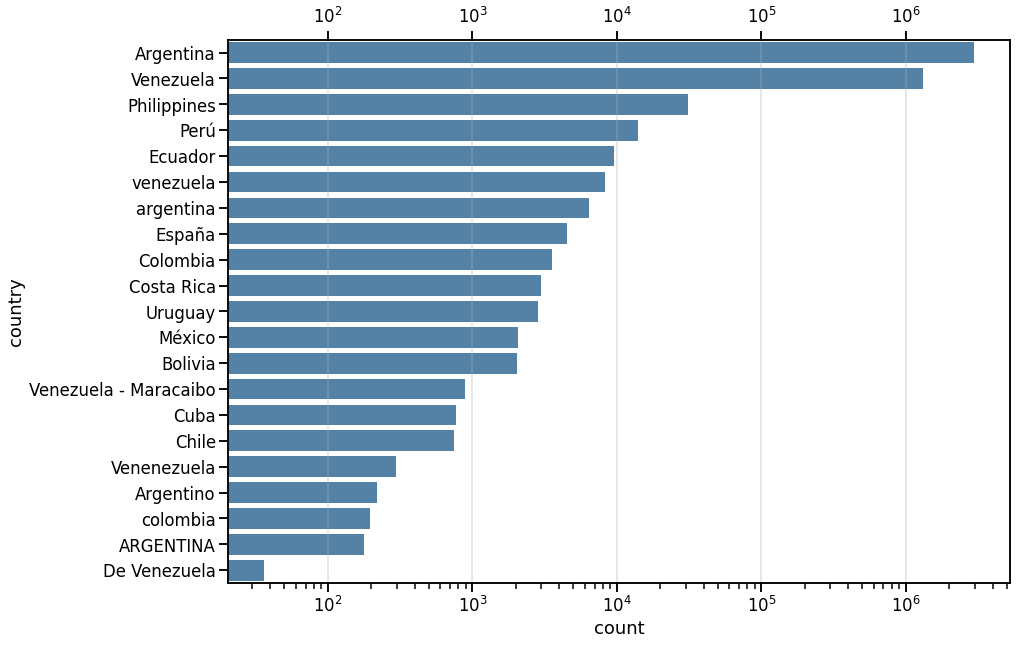

In [ ]:
from matplotlib import pyplot
fig = plt.figure(figsize = (14,10))

# esta variable nos va a servir para ordernar las barras de mayor a menor
order = df.country.value_counts().index

sns.countplot(data = df.fillna('NaN'),
             y = 'country',
             order = order,
             orient = 'h', 
             color = 'steelblue')
# definimos la escala del eje Y como logartimica porque hay mucha diferencia entre Argenitna, Venezuela y los demas paises
plt.xscale('log')

plt.tick_params(labeltop=True, top=True)

plt.grid(which = 'major', axis = 'x', alpha = 0.4)

#rotamos los labels del eje x 45 grados
#plt.xticks(rotation = 45)

plt.show()

(array([0, 1]), [Text(0, 0, 'f'), Text(1, 0, 't')])

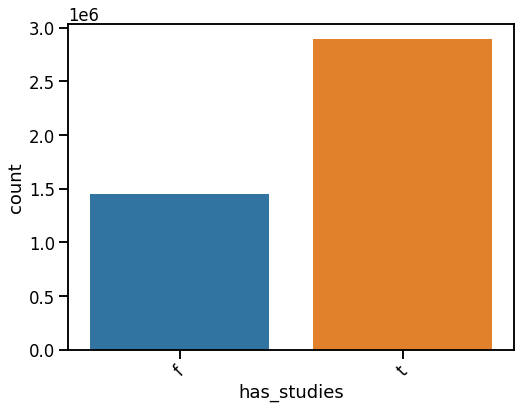

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.countplot(x=df.has_studies)
plt.xticks(rotation=45)

# Sección 4: (Opcional)

En base al analisis realizado en las secciones anteriores las tareas a realizar la limpiar el dataset son:
* Columna 'age': Cambiar nombre de columna a Year. Se puede generar una nueva columna que tenga la edad calculada a partir del anio.
* Columna 'country': Estandarizar las diferentes veriones de nombres para cada pais.
* Columna 'states': idem que con country

In [ ]:
df.rename(columns = {'age':'birth'}, inplace = True)
df.head()

,id,datetime,has_studies,gender,country,state,birth,cups
0,5316ca1c5ddca8e6ceccfce58f3b8540e540ee22f6180f...,2021-11-08 14:05:15,f,Hombre,Argentina,Santa Fe,"1,997.00",1268
1,bbb965ab0c80d6538cf2184babad2a564a010376712012...,2021-11-08 14:05:16,t,Hombre,Argentina,Santa fe,"1,999.00",1212
2,b4944c6ff08dc6f43da2e9c824669b7d927dd1fa976fad...,2021-11-08 14:05:16,f,Hombre,Argentina,Entre Rios,"2,003.00",1343
3,434c9b5ae514646bbd91b50032ca579efec8f22bf0b4aa...,2021-11-08 14:05:16,t,Hombre,Venezuela,Aragua,"2,000.00",1237
4,cd70bea023f752a0564abb6ed08d42c1440f2e33e29914...,2021-11-08 14:05:16,t,Hombre,Venezuela,Carabobo,"2,000.00",1191


In [ ]:
df.birth.value_counts(dropna=False).sort_index()

3.00           678
91.00        19199
97.00         9167
99.00         2611
200.00         195
1,959.00      1555
1,961.00      1404
1,963.00       429
1,966.00      2516
1,967.00       752
1,968.00      4233
1,970.00       975
1,972.00      4028
1,973.00     14713
1,974.00      3295
1,975.00      1112
1,976.00       240
1,977.00       451
1,978.00      2576
1,979.00      7308
1,980.00     11931
1,981.00      4227
1,982.00      5763
1,983.00      5703
1,984.00      5048
1,985.00      7816
1,986.00     17367
1,987.00     10587
1,988.00      9155
1,989.00     45964
1,990.00     68330
1,991.00    178418
1,992.00    117665
1,993.00    130687
1,994.00    223776
1,995.00    244079
1,996.00    320012
1,997.00    348563
1,998.00    365273
1,999.00    599284
2,000.00    564774
2,001.00    392502
2,002.00    286027
2,003.00    293785
2,004.00      8920
2,005.00     14851
2,009.00       603
2,021.00      6370
2,022.00       498
nan          39077
Name: birth, dtype: int64

In [ ]:
replacement_mapping_dict = {3:2003, 
                            91:1991,
                            97:1997,
                            99:1999,
                            200:2000
                           }

df.birth.replace(replacement_mapping_dict, inplace = True)

In [ ]:
df.birth.value_counts(dropna=False).sort_index()

1,959.00      1555
1,961.00      1404
1,963.00       429
1,966.00      2516
1,967.00       752
1,968.00      4233
1,970.00       975
1,972.00      4028
1,973.00     14713
1,974.00      3295
1,975.00      1112
1,976.00       240
1,977.00       451
1,978.00      2576
1,979.00      7308
1,980.00     11931
1,981.00      4227
1,982.00      5763
1,983.00      5703
1,984.00      5048
1,985.00      7816
1,986.00     17367
1,987.00     10587
1,988.00      9155
1,989.00     45964
1,990.00     68330
1,991.00    197617
1,992.00    117665
1,993.00    130687
1,994.00    223776
1,995.00    244079
1,996.00    320012
1,997.00    357730
1,998.00    365273
1,999.00    601895
2,000.00    564969
2,001.00    392502
2,002.00    286027
2,003.00    294463
2,004.00      8920
2,005.00     14851
2,009.00       603
2,021.00      6370
2,022.00       498
nan          39077
Name: birth, dtype: int64

Con este bloque confirmamos que las modificaciones sobre la columa birth (antes age) se realizaron correctamente.

In [ ]:
df.country.value_counts(dropna=False).sort_index()

ARGENTINA                    178
Argentina                2962277
Argentino                    220
Bolivia                     2021
Chile                        751
Colombia                    3567
Costa Rica                  2990
Cuba                         772
De Venezuela                  36
Ecuador                     9603
España                      4532
México                      2064
Perú                       13912
Philippines                30906
Uruguay                     2827
Venenezuela                  295
Venezuela                1312742
Venezuela - Maracaibo        889
argentina                   6359
colombia                     197
venezuela                   8277
NaN                        39077
Name: country, dtype: int64

In [ ]:
# este bloque realiza el cambio de nombres de los paises.
#Argenitna
df.country.replace(to_replace = ['ARGENTINA', 'Argentino', 'argentina'], 
                   value = 'Argentina',
                   inplace = True)
#Venezuela
df.country.replace(to_replace = ['De Venezuela', 'Venenezuela', 'Venezuela - Maracaibo', 'venezuela'],
                   value = 'Venezuela',
                   inplace = True)
#Colombia
df.country.replace(to_replace = 'colombia',
                   value = 'Colombia',
                   inplace = True)
#Filipinas
df.country.replace(to_replace = 'Philippines',
                   value = 'Filipinas',
                   inplace = True)
#Mejico. Cambiamos 'x' por 'j' para que quede en castellano y le scamos la tilde para evitar problemas despues.
df.country.replace(to_replace = 'México',
                   value = 'Mejico',
                   inplace = True)
#Peru. Le sacamos la tilde
df.country.replace(to_replace = 'Perú',
                   value = 'Peru',
                   inplace = True)

In [ ]:
df.country.value_counts(dropna=False).sort_index()

Argentina     2969034
Bolivia          2021
Chile             751
Colombia         3764
Costa Rica       2990
Cuba              772
Ecuador          9603
España           4532
Filipinas       30906
Mejico           2064
Peru            13912
Uruguay          2827
Venezuela     1322239
NaN             39077
Name: country, dtype: int64

Con este ultimo boque confirmamos que se realizaron las modificaciones de los nombres de los paises.

In [ ]:
arg_states = df.state[df.country == 'Argentina'].value_counts(dropna=False).sort_index().to_frame()
pd.options.display.max_rows = 100
arg_states
 

,state
BUENOS AIRES,178
Bs as,2108
Bs.as,10367
Buenas Aires,2219
Bueno Aires,18240
Buenoas Aires,1069
Buenos Aires,926677
Buenos aires,343018
Burnos Aires,55
C.A.B.A,13559


In [ ]:
#Argenitna
# A las ciudades que tienen nombres con tilde los reemplazamos por el nombre sin tilde.

la_pampa = ('la pampa')

la_rioja = ('la Rioja',
           'la rioja')

tucuman = ('Tucumán')

tierra_del_fuego = ('Tierra Del Fuego',
               'Tierra del fuego')

santiago_del_estero = ('Santiago Del Estero',
                'Santaigo del Estero',
                'Santiago del estero',
               'santiago del estero')

santa_fe = ('Santa Fé',
       'Santa fa',
        'Santa fe',
        'Santa fé',
        'Santafe',
       'santa fe')

santa_cruz = ('Santa cruz',
         'santa cruz')

san_salvador_de_jujuy = ('San salvador de jujuy')

san_luis = ('San luis')

rio_negro = ('Rio negro',
          'Río negro')

neuquen = ('Neuquén')

entre_rios = ('Entre Ríos',
          'Entre rios',
          'Entre ríos',
         'entre rios',
         'entre ríos')

cordoba = ('Córdoba',
       'cordoba')


buenos_aires = ('BUENOS AIRES',
              'Bs as',
              'Bs.as',
              'Buenas Aires',
              'Bueno Aires',
              'Buenoas Aires',
              'Buenos aires',
              'Burnos Aires',
        'buenos aires',
        'buenos aries')

caba = ('C.A.B.A',
        'Caba',
        'Capital Federal',
        'Ciudad Autónoma de Buenos Aires',
        'Ciudad autónoma de Buenos Aires',
        'Ciudad de Buenos Aires',
        'Ciudad de Buenos aires',
       'caba',
       'capital federal')

replace_dic = {la_pampa: 'La Pampa', la_rioja : 'La Rioja', tucuman : 'Tucuman', tierra_del_fuego : 'Tierra del Fuego',
                santiago_del_estero : 'Santiago del Estero', santa_fe : 'Santa Fe', santa_cruz: 'Santa Cruz', 
                san_salvador_de_jujuy : 'San Salvador de Jujuy', san_luis : 'San Luis', rio_negro : 'Rio Negro',
                neuquen : 'Neuquen', entre_rios : 'Entre Rios', cordoba : 'Cordoba', buenos_aires : 'Buenos Aires',
                caba : 'CABA'}

In [ ]:
for replace, city in replace_dic.items():
    df.state.replace(to_replace = replace, 
                   value = city,
                   inplace = True)

In [ ]:
arg_states = df.state[df.country == 'Argentina'].value_counts(dropna=False).sort_index().to_frame()
pd.options.display.max_rows = 100
arg_states


,state
Buenos Aires,1363802
CABA,87419
Catamarca,7014
Chaco,62952
Chubut,20094
Cordoba,221841
Corrientes,18698
Entre Rios,148071
Formosa,882
Jujuy,13570


In [ ]:
blv_states = df.state[df.country == 'Bolivia'].value_counts(dropna=False).sort_index().to_frame()
pd.options.display.max_rows = 100
blv_states

,state
Santa Cruz,301
Santa Cruz de la Sierra,1720


In [ ]:
df.state.replace(to_replace = 'Santa Cruz', 
                   value = 'Santa Cruz de la Sierra',
                   inplace = True)

In [ ]:
blv_states = df.state[df.country == 'Bolivia'].value_counts(dropna=False).sort_index().to_frame()
pd.options.display.max_rows = 100
blv_states

,state
Santa Cruz de la Sierra,2021


In [ ]:
chl_states = df.state[df.country == 'Chile'].value_counts(dropna=False).sort_index().to_frame()
pd.options.display.max_rows = 100
chl_states

,state
Bio Bio,507
santiago,244


In [ ]:
df.state.replace(to_replace = 'santiago', 
                   value = 'Santiago de Chile',
                   inplace = True)

In [ ]:
chl_states = df.state[df.country == 'Chile'].value_counts(dropna=False).sort_index().to_frame()
pd.options.display.max_rows = 100
chl_states

,state
Bio Bio,507
Santiago de Chile,244


In [ ]:
col_states = df.state[df.country == 'Colombia'].value_counts(dropna=False).sort_index().to_frame()
pd.options.display.max_rows = 100
col_states

,state
Atlántico,49
Bogota,406
Bogotá D.C,906
Cundinamarca,211
Dosquebradas,1620
Valle,375
valle del cauca,197


In [ ]:
df.state.replace(to_replace = 'Bogotá D.C', 
                   value = 'Bogota',
                   inplace = True)


df.state.replace(to_replace = ['Valle', 'valle del cauca'], 
                   value = 'Valle del Cauca',
                   inplace = True)

In [ ]:
col_states = df.state[df.country == 'Colombia'].value_counts(dropna=False).sort_index().to_frame()
pd.options.display.max_rows = 100
col_states

,state
Atlántico,49
Bogota,1312
Cundinamarca,211
Dosquebradas,1620
Valle del Cauca,572


In [ ]:
cr_states = df.state[df.country == 'Costa Rica'].value_counts(dropna=False).sort_index().to_frame()
pd.options.display.max_rows = 100
cr_states

,state
Alajuela,516
Cartago,605
San José,1869


In [ ]:
cuba_states = df.state[df.country == 'Cuba'].value_counts(dropna=False).sort_index().to_frame()
pd.options.display.max_rows = 100
cuba_states

,state
La Habana,49
Las Tunas,646
Matanzas,77


In [ ]:
ecu_states = df.state[df.country == 'Ecuador'].value_counts(dropna=False).sort_index().to_frame()
pd.options.display.max_rows = 100
ecu_states

,state
Guayas,3601
Imbabura,2822
Orellana,2312
Pichincha,868


In [ ]:
esp_states = df.state[df.country == 'España'].value_counts(dropna=False).sort_index().to_frame()
pd.options.display.max_rows = 100
esp_states

,state
Andalucía,428
Madrid,2884
Valencia,1220


In [ ]:
flp_states = df.state[df.country == 'Filipinas'].value_counts(dropna=False).sort_index().to_frame()
pd.options.display.max_rows = 100
flp_states

,state
Camarines Sur,3219
Camarines sur,3562
Camarines sur naga city,5458
Camarinesur,1778
camarines sur,9663
camarines sur naga city,7226


In [ ]:
camarines_sur = ('Camarines sur','Camarinesur', 'camarines sur')
naga = ('Camarines sur naga city','camarines sur naga city')

replace_dic = {camarines_sur : 'Camarines Sur', naga : 'Camarines Sur (Naga)'}

In [ ]:
for replace, city in replace_dic.items():
    df.state.replace(to_replace = replace, 
                   value = city,
                   inplace = True)

In [ ]:
flp_states = df.state[df.country == 'Filipinas'].value_counts(dropna=False).sort_index().to_frame()
pd.options.display.max_rows = 100
flp_states

,state
Camarines Sur,18222
Camarines Sur (Naga),12684


In [ ]:
mco_states = df.state[df.country == 'Mejico'].value_counts(dropna=False).sort_index().to_frame()
pd.options.display.max_rows = 100
mco_states

,state
Tlaxcala,165
Veracruz,1899


In [ ]:
peru_states = df.state[df.country == 'Peru'].value_counts(dropna=False).sort_index().to_frame()
pd.options.display.max_rows = 100
peru_states

,state
Chiclayo,480
Lima,13432


In [ ]:
uru_states = df.state[df.country == 'Uruguay'].value_counts(dropna=False).sort_index().to_frame()
pd.options.display.max_rows = 100
uru_states

,state
Canelones,814
Maldonado,779
Montevideo,1234


In [ ]:
vnz_states = df.state[df.country == 'Venezuela'].value_counts(dropna=False).sort_index().to_frame()
pd.options.display.max_rows = 110
vnz_states

,state
Amazonas,131
Andes,1270
Anzoategui,20485
Anzoatequi,756
Anzoátegui,36584
Anzuategui,3206
Apure,3423
Aragua,79158
Aragua - región central,11504
Barcelona,1417


In [ ]:
df_00 = df[df.state == 'Las provincias eran las divisiones administrativas utilizadas en Venezuela desde la colonización española hasta la conclusión de la Guerra Federal - cuando una nueva constitución transformó a estas subdivisiones en estados federales']
df_00

,id,datetime,has_studies,gender,country,state,birth,cups
2680835,e39eef82f61b21e2e7f762fcc4307358f165757f2e77ec...,2022-01-19 19:11:33,t,Hombre,Venezuela,Las provincias eran las divisiones administrat...,"2,003.00",1037
2681651,e39eef82f61b21e2e7f762fcc4307358f165757f2e77ec...,2022-01-19 19:31:24,t,Hombre,Venezuela,Las provincias eran las divisiones administrat...,"2,003.00",1037
2681826,e39eef82f61b21e2e7f762fcc4307358f165757f2e77ec...,2022-01-19 20:12:26,t,Hombre,Venezuela,Las provincias eran las divisiones administrat...,"2,003.00",1037
2682369,e39eef82f61b21e2e7f762fcc4307358f165757f2e77ec...,2022-01-19 20:31:15,t,Hombre,Venezuela,Las provincias eran las divisiones administrat...,"2,003.00",1037
2683130,e39eef82f61b21e2e7f762fcc4307358f165757f2e77ec...,2022-01-19 21:10:25,t,Hombre,Venezuela,Las provincias eran las divisiones administrat...,"2,003.00",1037
...,...,...,...,...,...,...,...,...
2791669,e39eef82f61b21e2e7f762fcc4307358f165757f2e77ec...,2022-01-24 11:31:15,t,Hombre,Venezuela,Las provincias eran las divisiones administrat...,"2,003.00",912
2792386,e39eef82f61b21e2e7f762fcc4307358f165757f2e77ec...,2022-01-24 12:14:54,t,Hombre,Venezuela,Las provincias eran las divisiones administrat...,"2,003.00",912
2792535,e39eef82f61b21e2e7f762fcc4307358f165757f2e77ec...,2022-01-24 12:35:59,t,Hombre,Venezuela,Las provincias eran las divisiones administrat...,"2,003.00",912
2793406,e39eef82f61b21e2e7f762fcc4307358f165757f2e77ec...,2022-01-24 13:23:24,t,Hombre,Venezuela,Las provincias eran las divisiones administrat...,"2,003.00",912


In [ ]:
# Venezuela
anzoategui = ('Anzoatequi',
              'Anzoátegui',
              'Anzuategui',
              'Estado Anzoategui',
              'Estado Anzoátegui',
              'anzoategui'
              )

aragua = ('Aragua - región central',
         'Estado Aragua',
         'Estado aragua',
         'aragua')

caracas = ('CARACAS',
          'Caraca',
          'caracas',
          'Miranda - Caracas',
          'Miranda  - Caracas')

distrito_capital = ('Distrito capital',
                   'Dtto capital',
                   'caracas distrito capital',
                   'distrito capital')

la_guaira = ('La guaira')

maracaibo = ('Maracaibo zulia',
            'maracaibo')

san_joaquin = ('San Joaquin')

san_juan = ('San Juan')

tachira = ('Táchira')

carabobo_valencia = ('Carabobo Valencia', 
                    'carabobo',
                    'montalban estado carabobo',
                    'Carabobo valencia')

catia_la_mar = ('Catia la mar')

guarico = ('Edo Guárico',
           'Guarico',
           'Guárico')

estado_xx = ('Las provincias eran las divisiones administrativas utilizadas en Venezuela desde la colonización española hasta la conclusión de la Guerra Federal - cuando una nueva constitución transformó a estas subdivisiones en estados federales')

nueva_esparta = ('Edo. Nueva Esparta')

miranda = ('Edo.Miranda',
          'Estado Miranda',
          'Estado bolivariano de miranda',
          'miranda')

merida = ('merida')

monagas = ('monagas')

montalban = ('montalban')

zulia = ('zulia',
        'Zulia - Maracaibo',
        'Zulia - Maracaibo')
vargas = ('Esrado vargas')

falcon = ('Estado Falcon',
         'Falcón',
         'falcon')

la_guaira = ('Estado La Guaira')

bolivar = ('Estado bolivar')

ezeequiel_zamora = ('Ezequiel zamora')

puerto_la_cruz = ('Puerto la cruz')

municipio_libertador = ('Municipio Libertad or')

lara = ('lara')

barinas = ('barinas')

cojedes = ('cojedes')

cumana = ('cumana')

cumbres_de_curumo = ('cumbre de curumo')

san_joaquin = ('San joaquin')

san_juan = ('San juan')



replace_dic = {anzoategui : 'Anzoategui', aragua : 'Aragua',  caracas : 'Caracas', distrito_capital : 'Distrito Capital',
              la_guaira : 'La Guaira', maracaibo : 'Maracaibo', san_joaquin : 'San Joaquin', san_juan : 'San Juan',
              tachira : 'Tachira', carabobo_valencia : 'Carabobo', catia_la_mar : 'Catia la Mar', 
              guarico : 'Guarico', estado_xx : None, nueva_esparta : 'Nueva Esparta', miranda : 'Miranda', 
              vargas : 'Vargas', falcon : 'Falcon', la_guaira : 'La Guaira', bolivar : 'Bolivar',
              ezeequiel_zamora : 'Ezequiel Zamora', puerto_la_cruz : 'Puerto la Cruz', 
              municipio_libertador : 'Munucipio Libertador', lara : 'Lara', merida : 'Merida', monagas : 'Monagas',
              montalban : 'Montalban', zulia : 'Zulia', barinas : 'Barinas', cojedes : 'Cojedes', cumana : 'Cumana',
              cumbres_de_curumo : 'Cumbres de Curumo', san_joaquin : 'San Joaquin', san_juan : 'San Juan'}

In [ ]:
for replace, city in replace_dic.items():
    df.state.replace(to_replace = replace, 
                   value = city,
                   inplace = True)

In [ ]:
vnz_states = df.state[df.country == 'Venezuela'].value_counts(dropna=False).sort_index().to_frame()
pd.options.display.max_rows = 110
vnz_states

,state
Amazonas,131
Andes,1270
Anzoategui,67491
Apure,3423
Aragua,95343
Barcelona,1417
Barinas,2331
Barquisimeto,1752
Bolivar,14382
Buenos Aires,2071


In [ ]:
nan_states = df.state[df.country.isna()].value_counts(dropna=False).sort_index().to_frame()
pd.options.display.max_rows = 100
nan_states

,state
nan,39077


In [ ]:
df.to_csv('datos_jugadores_clean.csv', index = False)

In [ ]:
# chequear si el archivo se guardo correctamente
import pandas as pd
df = pd.read_csv('datos_jugadores_clean.csv')
df.head()

,id,datetime,has_studies,gender,country,state,birth,cups
0,5316ca1c5ddca8e6ceccfce58f3b8540e540ee22f6180f...,2021-11-08 14:05:15,f,Hombre,Argentina,Santa Fe,"1,997.00",1268
1,bbb965ab0c80d6538cf2184babad2a564a010376712012...,2021-11-08 14:05:16,t,Hombre,Argentina,Santa Fe,"1,999.00",1212
2,b4944c6ff08dc6f43da2e9c824669b7d927dd1fa976fad...,2021-11-08 14:05:16,f,Hombre,Argentina,Entre Rios,"2,003.00",1343
3,434c9b5ae514646bbd91b50032ca579efec8f22bf0b4aa...,2021-11-08 14:05:16,t,Hombre,Venezuela,Aragua,"2,000.00",1237
4,cd70bea023f752a0564abb6ed08d42c1440f2e33e29914...,2021-11-08 14:05:16,t,Hombre,Venezuela,Carabobo,"2,000.00",1191
